In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [2]:
# Import Data:
with open ('data/scrubbed_data_yelp_inspec_latest.pickle','rb') as f:
    df_latest = pickle.load(f)

df_latest = df_latest.reset_index(drop=True)

In [3]:
# Import Model
with open ('models/decision_tree_model.pickle','rb') as f:
    d_tree_model = pickle.load(f)

In [4]:
df_latest.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,display_phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,count_range_11-20,count_range_2-5,count_range_21-30,count_range_31+,count_range_6-10,price_value_0.0,price_value_1.0,price_value_2.0,price_value_3.0,price_value_4.0
0,50122550,& CAFE COFFEE SHOP,Manhattan,222,EAST 51 STREET,10022.0,(908) 590-3763,Coffee/Tea,2023-01-03,Violations were cited in the following area(s).,...,1,0,0,0,0,1,0,0,0,0
1,50126158,& SON STEAKEASY,Manhattan,62,WEST 9 STREET,10011.0,(212) 933-1193,American,2023-02-04,Violations were cited in the following area(s).,...,1,0,0,0,0,1,0,0,0,0
2,40673117,10TH AVENUE PIZZA & CAFE,Manhattan,256,10TH AVE BET 24 & 25 ST ),10001.0,(212) 366-9222,Pizza,2023-03-07,Violations were cited in the following area(s).,...,0,0,1,0,0,0,1,0,0,0
3,50080371,19 CLEVELAND BY NISH NUSH,Manhattan,19,CLEVELAND PLACE,10012.0,(646) 823-9227,Mediterranean,2023-01-04,Violations were cited in the following area(s).,...,1,0,0,0,0,0,0,1,0,0
4,50072975,22 THAI CUISINE,Manhattan,59,NASSAU STREET,10038.0,(212) 732-9250,Thai,2023-02-16,Violations were cited in the following area(s).,...,0,0,1,0,0,0,1,0,0,0


In [5]:
df_latest['INSPECTION DATE'].sort_values()

0     2023-01-03
114   2023-01-03
255   2023-01-03
642   2023-01-03
428   2023-01-03
         ...    
168   2023-03-17
57    2023-03-17
104   2023-03-17
541   2023-03-17
84    2023-03-17
Name: INSPECTION DATE, Length: 817, dtype: datetime64[ns]

In [6]:
X_test = df_latest.drop(columns=['CAMIS','DBA','BORO','BUILDING','STREET','ZIPCODE','display_phone','CUISINE DESCRIPTION',
                           'INSPECTION DATE','ACTION','SCORE','GRADE DATE','INSPECTION TYPE','Latitude','Longitude',
                           '#_of_inspections','name','price','rating','review_count','transactions',
                            'categories_clean','latitude','longitude','address','city','zip_code',
                            'state','num_of_cat','combined_score', 'GRADE'],
                   axis=1)

In [7]:
y_test = df_latest.loc[:,'combined_score']

In [8]:
X_test.head()

,acaibowls,afghani,african,arcades,argentine,asianfusion,australian,austrian,bagels,bakeries,...,count_range_11-20,count_range_2-5,count_range_21-30,count_range_31+,count_range_6-10,price_value_0.0,price_value_1.0,price_value_2.0,price_value_3.0,price_value_4.0
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


<Axes: >

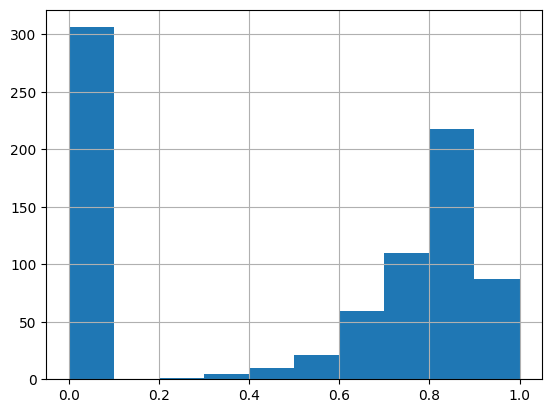

In [9]:
y_test.hist()

In [10]:
y_pred = d_tree_model.predict(X_test)

(array([ 80., 105.,  78.,  50.,  21.,  34., 118., 234.,  94.,   3.]),
 array([0.01818182, 0.11636364, 0.21454545, 0.31272727, 0.41090909,
        0.50909091, 0.60727273, 0.70545455, 0.80363636, 0.90181818,
        1.        ]),
 <BarContainer object of 10 artists>)

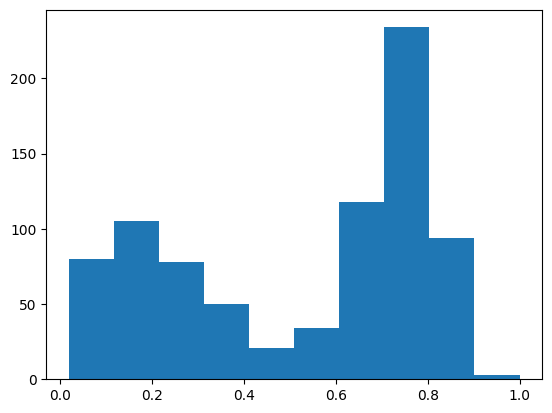

In [11]:
plt.hist(y_pred)

In [12]:
def build_cumulative_curve(predicted_probs, y, scale=100, order=None):

    # Sort these probabilities and the true value in descending order of probability
    if order is None:
        order = np.argsort(predicted_probs)[::-1]
    predicted_probs_sorted = predicted_probs[order]
    Y_sorted = np.array(y)[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(predicted_probs_sorted)) + 1
    y_cumulative = np.cumsum(Y_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative, order

In [13]:
# Order wrt normalized combined score
x_cumulative, y_cumulative, order = build_cumulative_curve(y_pred, y_test, scale=1)

In [14]:
df_latest['CUISINE DESCRIPTION'].value_counts()

American     177
Italian       75
Japanese      68
Chinese       61
Pizza         39
            ... 
Brazilian      1
Basque         1
Hotdogs        1
Turkish        1
Egyptian       1
Name: CUISINE DESCRIPTION, Length: 62, dtype: int64

In [15]:
def restaurant_cuisine_entropy(cuisines):
    cuisine_counts = cuisines.value_counts()
    cuisine_probs = cuisine_counts/cuisine_counts.sum()
    return -(cuisine_probs*np.log(cuisine_probs)).sum()


In [16]:
df_latest.index[[1,24]]

Int64Index([1, 24], dtype='int64')

In [17]:
y_test.index[[1,24]]

Int64Index([1, 24], dtype='int64')

In [18]:
from itertools import combinations

In [19]:
df_latest.index

RangeIndex(start=0, stop=817, step=1)

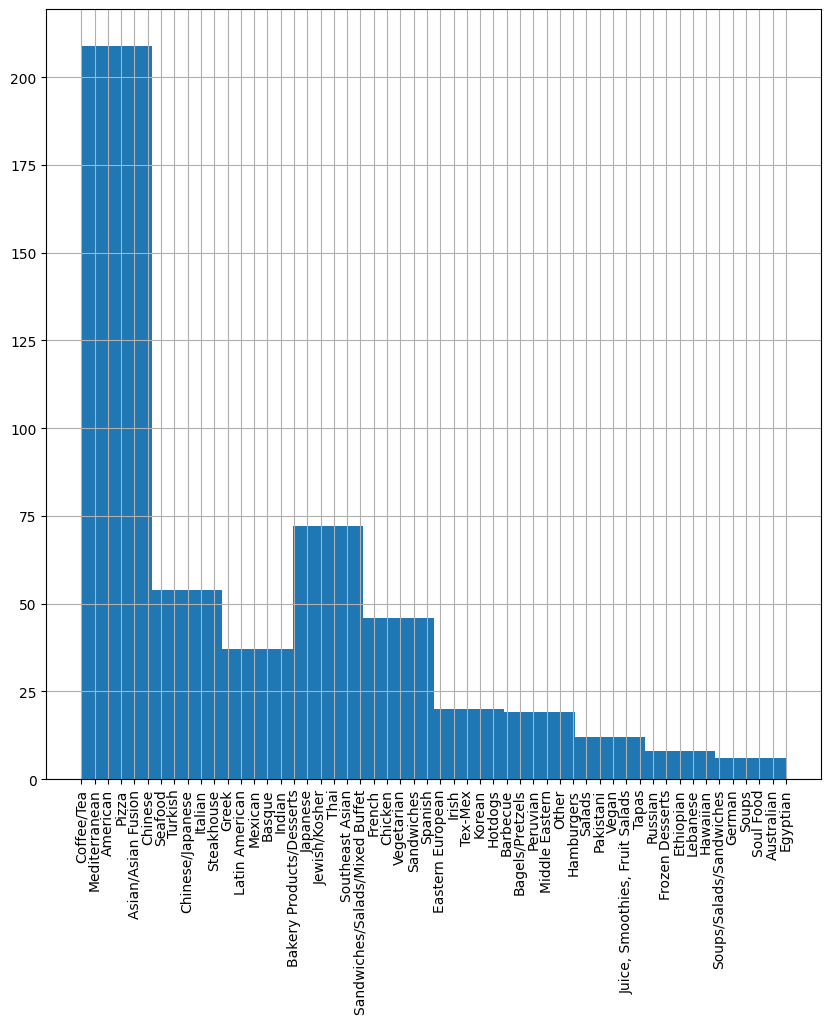

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
index_combined_score_above_0_5 = np.where(y_pred>0.5)
df_latest.iloc[index_combined_score_above_0_5]['CUISINE DESCRIPTION'].hist(ax=ax)
plt.xticks(rotation=90)
plt.show()

In [ ]:
index_combined_score_above_0_5 = np.where(y_pred>0.5)

In [48]:
pd.Series(y_pred>0.5)

0       True
1      False
2      False
3       True
4      False
       ...  
812    False
813     True
814     True
815     True
816    False
Length: 817, dtype: bool

In [50]:
df_latest['CUISINE DESCRIPTION']!='Coffee/Tea'

0      False
1       True
2       True
3       True
4       True
       ...  
812     True
813     True
814     True
815     True
816     True
Name: CUISINE DESCRIPTION, Length: 817, dtype: bool

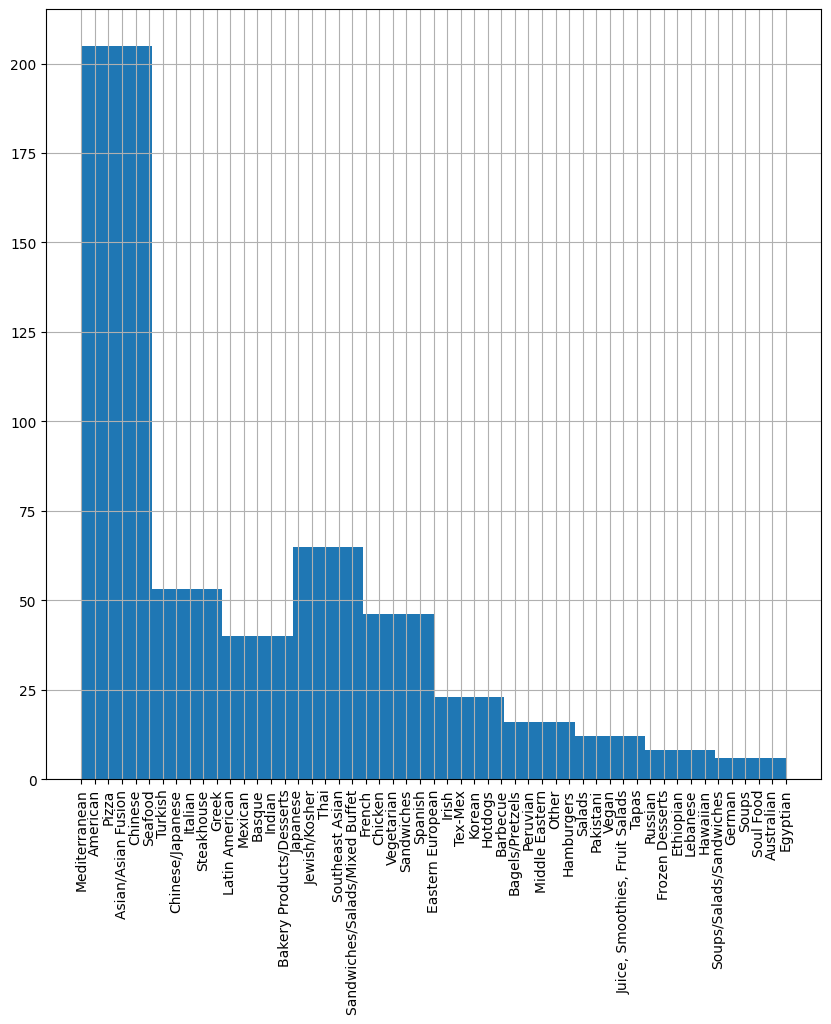

In [55]:
index_combined_score_above_0_5_not_coffee_tea = np.where((df_latest['CUISINE DESCRIPTION']!='Coffee/Tea') & pd.Series(y_pred>0.5))
fig, ax = plt.subplots(figsize=(10,10))
df_latest.iloc[index_combined_score_above_0_5_not_coffee_tea]['CUISINE DESCRIPTION'].hist(ax=ax)
plt.xticks(rotation=90)
plt.show()


In [58]:
df_latest.iloc[index_combined_score_above_0_5_not_coffee_tea].index

Int64Index([  3,   5,   6,   8,   9,  12,  13,  14,  15,  16,
            ...
            801, 802, 804, 806, 807, 808, 809, 813, 814, 815],
           dtype='int64', length=474)

In [86]:
df_latest_index_combinations = combinations(
    df_latest.iloc[index_combined_score_above_0_5_not_coffee_tea].index,
    473
)

In [66]:
check = list(df_latest_index_combinations.__iter__())

In [69]:
index_check = check[0]

In [83]:
(y_pred[list(index_check)]*14000 + (1-y_pred[list(index_check)])*(-5000)).sum()

4656450.0

In [72]:
df_latest.iloc[list(index_check)]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,display_phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,count_range_11-20,count_range_2-5,count_range_21-30,count_range_31+,count_range_6-10,price_value_0.0,price_value_1.0,price_value_2.0,price_value_3.0,price_value_4.0
3,50080371,19 CLEVELAND BY NISH NUSH,Manhattan,19,CLEVELAND PLACE,10012.0,(646) 823-9227,Mediterranean,2023-01-04,Violations were cited in the following area(s).,...,1,0,0,0,0,0,0,1,0,0
5,50062581,375 THRICE COOKED FRIES,Manhattan,124,LUDLOW STREET,10002.0,(646) 682-7578,American,2023-01-31,Violations were cited in the following area(s).,...,0,0,0,0,1,0,0,1,0,0
6,50100251,5 STAR CHEESE STEAK AND PIZZA,Manhattan,2039,1 AVENUE,10029.0,(212) 987-1540,Pizza,2023-01-11,Violations were cited in the following area(s).,...,0,0,0,0,1,0,1,0,0,0
8,50079290,886,Manhattan,26,SAINT MARKS PLACE,10003.0,(646) 882-0231,Asian/Asian Fusion,2023-02-10,Violations were cited in the following area(s).,...,0,0,0,0,1,0,0,1,0,0
9,41273802,8TH STREET WINECELLAR,Manhattan,28,WEST 8 STREET,10011.0,(212) 260-9463,American,2023-02-14,Violations were cited in the following area(s).,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,50092153,XING WONG BBQ,Manhattan,89,EAST BROADWAY,10002.0,(212) 779-8899,Barbecue,2023-03-10,Violations were cited in the following area(s).,...,1,0,0,0,0,0,1,0,0,0
808,41011076,YAKITORI SUN-CHAN,Manhattan,2707,BROADWAY,10025.0,(212) 749-5008,Japanese,2023-02-13,Establishment re-opened by DOHMH.,...,1,0,0,0,0,0,0,1,0,0
809,41718215,YAKITORI TOTTO,Manhattan,251,WEST 55 STREET,10019.0,(212) 245-4555,Japanese,2023-01-07,Violations were cited in the following area(s).,...,1,0,0,0,0,0,0,1,0,0
813,50101859,ZLS BBQ,Manhattan,219,EAST 23 STREET,10010.0,(646) 781-9595,Chinese,2023-03-09,Violations were cited in the following area(s).,...,0,0,0,0,1,1,0,0,0,0


In [78]:
restaurant_cuisine_entropy(df_latest.iloc[list(index_check)]['CUISINE DESCRIPTION'])

3.0320978336946514

In [87]:
entropy_list = []
profit_list = []
for each_combo in df_latest_index_combinations:
    df_latest_combo = df_latest.iloc[list(each_combo)]
    entropy_list.append(restaurant_cuisine_entropy(df_latest_combo['CUISINE DESCRIPTION']))
    y_pred_combo = y_pred[list(each_combo)]
    profit = (y_pred_combo*14000 + (1-y_pred_combo)*(-5000)).sum()
    profit_list.append(profit)

In [89]:
profit_list

[4656450.0,
 4662150.0,
 4656450.0,
 4656450.0,
 4658350.0,
 4660250.0,
 4660250.0,
 4658350.0,
 4662150.0,
 4662150.0,
 4656450.0,
 4658350.0,
 4656450.0,
 4660250.0,
 4660250.0,
 4658350.0,
 4660250.0,
 4656450.0,
 4662150.0,
 4658350.0,
 4658350.0,
 4656450.0,
 4660250.0,
 4660250.0,
 4658350.0,
 4658350.0,
 4658350.0,
 4658350.0,
 4658350.0,
 4658350.0,
 4658350.0,
 4656450.0,
 4662150.0,
 4658350.0,
 4658350.0,
 4660250.0,
 4658350.0,
 4658350.0,
 4658350.0,
 4660250.0,
 4658350.0,
 4658350.0,
 4656450.0,
 4658350.0,
 4658350.0,
 4658350.0,
 4658350.0,
 4656450.0,
 4656450.0,
 4658350.0,
 4656450.0,
 4660250.0,
 4660250.0,
 4656450.0,
 4658350.0,
 4658350.0,
 4662150.0,
 4656450.0,
 4660250.0,
 4658350.0,
 4660250.0,
 4658350.0,
 4660250.0,
 4656450.0,
 4660250.0,
 4658350.0,
 4656450.0,
 4658350.0,
 4658350.0,
 4658350.0,
 4662150.0,
 4660250.0,
 4656450.0,
 4660250.0,
 4660250.0,
 4660250.0,
 4660250.0,
 4660250.0,
 4656450.0,
 4658350.0,
 4660250.0,
 4658350.0,
 4660250.0,
 466

In [88]:
entropy_list

[3.0320978336946514,
 3.0291669788085627,
 3.0384362015998034,
 3.039053393111948,
 3.039053393111948,
 3.0332040665567326,
 3.0332040665567326,
 3.036039768943688,
 3.041446277441438,
 3.037767322955901,
 3.041446277441438,
 3.041446277441438,
 3.041446277441438,
 3.036934315810506,
 3.0291669788085627,
 3.041446277441438,
 3.041446277441438,
 3.0384362015998034,
 3.0332040665567326,
 3.0392081648697076,
 3.0332040665567326,
 3.041446277441438,
 3.0344566450193255,
 3.041446277441438,
 3.039053393111948,
 3.037767322955901,
 3.041446277441438,
 3.037767322955901,
 3.036934315810506,
 3.037767322955901,
 3.0320978336946514,
 3.0372075861935923,
 3.0392081648697076,
 3.0392081648697076,
 3.0392081648697076,
 3.0392081648697076,
 3.039053393111948,
 3.0392081648697076,
 3.039053393111948,
 3.0372075861935923,
 3.0344566450193255,
 3.041446277441438,
 3.036039768943688,
 3.041446277441438,
 3.041446277441438,
 3.041446277441438,
 3.041446277441438,
 3.0392081648697076,
 3.041446277441438,

Text(0, 0.5, 'Profit')

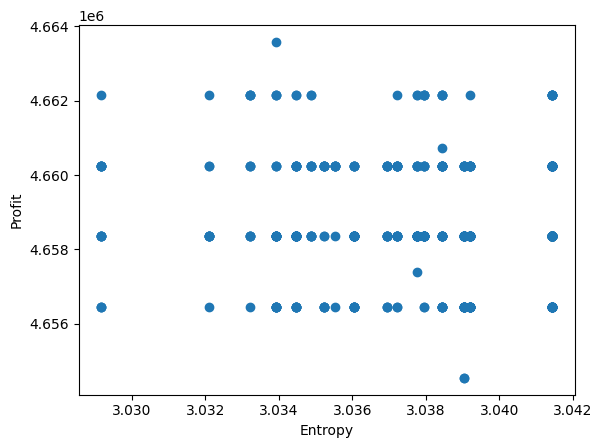

In [90]:
plt.scatter(entropy_list, profit_list)
plt.xlabel('Entropy')
plt.ylabel('Profit')